In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
trap = pd.read_csv('timing_trap.csv', header=None, names=['method', 'val', 'threads', 'iter', 'time', 'avg_time'])
mc   = pd.read_csv('timing_mc.csv'  , header=None, names=['method', 'val', 'threads', 'iter', 'time', 'avg_time'])

In [3]:
print "Data - Trapezoidal \n"
trap = trap.groupby(['threads']).mean()
print trap['avg_time']
print "\nData - Monte Carlo\n"
mc = mc.groupby(['threads']).mean()
print mc['avg_time']

Data - Trapezoidal 

threads
1    0.000207
2    0.000191
4    0.000197
6    0.001308
8    0.040326
Name: avg_time, dtype: float64

Data - Monte Carlo

threads
1    0.000429
2    0.005920
4    0.007602
6    0.012370
8    0.069017
Name: avg_time, dtype: float64


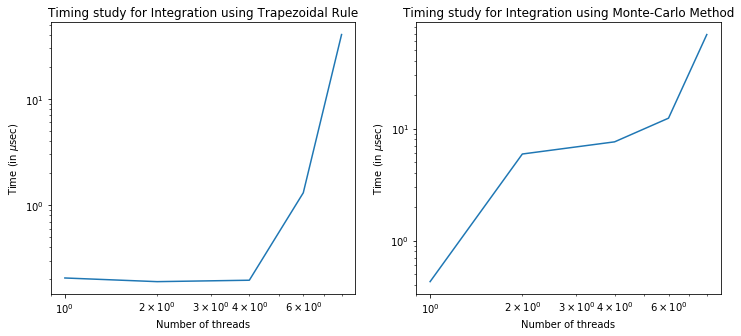

In [4]:
fig, axs = plt.subplots(1,2, figsize=(12,5))

axs[0].loglog(trap.index,trap.avg_time*1e3);
axs[0].set_xlabel('Number of threads');
axs[0].set_ylabel(r'Time (in $\mu$sec)');
axs[0].set_title('Timing study for Integration using Trapezoidal Rule')

axs[1].loglog(mc.index,mc.avg_time*1e3);
axs[1].set_xlabel('Number of threads');
axs[1].set_ylabel(r'Time (in $\mu$sec)');
axs[1].set_title('Timing study for Integration using Monte-Carlo Method')

plt.savefig('timing.png')
plt.show()

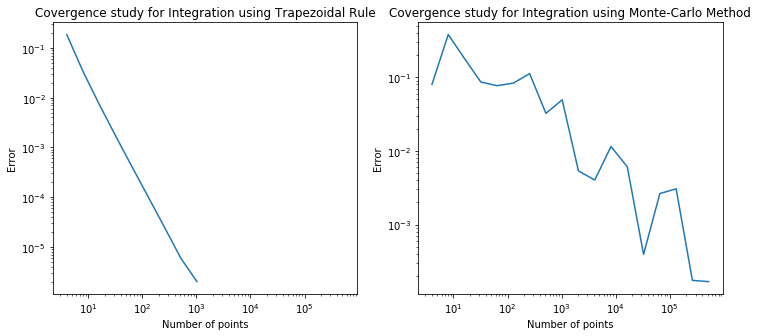

In [5]:
conv = pd.read_csv('conv.csv',header = None, names=['method','val','numpoints'])
tr = conv.loc[conv['method']=='T']
mc = conv.loc[conv['method']=='M']

tx = tr.numpoints
mx = mc.numpoints
ty = abs(2-tr.val)
my = abs(2-mc.val)

fig, axs = plt.subplots(1,2, figsize=(12,5))

axs[0].loglog(tx,ty);
axs[0].set_xlabel('Number of points');
axs[0].set_ylabel('Error');
axs[0].set_title('Covergence study for Integration using Trapezoidal Rule')

axs[1].loglog(mx,my);
axs[1].set_xlabel('Number of points');
axs[1].set_ylabel('Error');
axs[1].set_title('Covergence study for Integration using Monte-Carlo Method')

plt.savefig('conv.png')
plt.show()